# Relatório Intermedário SuperComputação

### Feito por:  *André Tavernaro*

Em Bioinformática, o problema de alinhamento de sequências de DNA consiste no processo de comparar duas ou mais sequências de bases de forma a se observar seu nível de similaridade. Objetivo desse projeto é desenvolver programas utilizando diversas estratégias para encontrar o alinhamento entre duas sequências de DNA. Dentre as estratégias utilizadas estão: Heuristica de Smith-Waterman , Busca Local e Busca Exaustiva.

Nesse relatório, para cada uma das 3 estratégias, foram rodados 100 arquivos de entrada, sendo que o tamanho das sequencias de DNA variam de 10 a 250. Isso se deve ao fato de que sequencias com tamanhos maiores que 250 acabam demorando muito com a busca exaustiva na minha máquina, então decidi que todos os 3 códigos rodassem as mesmas entradas com essa limitação, para facilitar a comparação.

In [819]:
import os
import matplotlib.pyplot as plt
import time
import subprocess
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


In [820]:
def roda_com_entrada(executavel, arquivo_in):
  with open(arquivo_in) as f:
    start = time.perf_counter()
    proc = subprocess.run([executavel], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()

  return end-start

In [821]:
in_files = os.listdir('in-files')

In [822]:
tamanhos_A = []
for file in in_files:
    with open('in-files/{}'.format(file)) as f :
        text_splitted = f.read().splitlines()
    f.close()
    tamanhos_A.append(text_splitted[0])
tamanhos_A = [int(x) for x in tamanhos_A]

In [823]:
tamanhos_B = []
for file in in_files:
    with open('in-files/{}'.format(file)) as f :
        text_splitted = f.read().splitlines()
    f.close()
    tamanhos_B.append(text_splitted[1])
tamanhos_B = [int(x) for x in tamanhos_B]

# Parte 1 - Heurística de Alinhamento Local de Smith-Waterman

Neste algoritmo, primeiramente foi feito a construção de uma Matriz H com scores que indicam um nivel de similaridade entre as sequências. Esse valores de score foram construidos de acordo com acertos(match) e erros(gap e mismatch), desse modo os acertos contribuem positvamente com o score e os erros negativamente.

Essa Matriz H de alinhamento não é composta puramente por valores inteiros de score, ela na verdade é composta por elementos que contem propriedades de score e movimento utilizado para chegar da posição anterior até sua poisção atual. Entre esses movimentos estão três opções: Diagonal , salto para baixo e salto para a direita. Com a matriz H contstruida conseguimos achar o maior valor de score nela, que será importante para prosseguir.

Logo depois, partindo do elemento da Matriz H com o maior score, traçamos o caminho contrário até chegar num elemento que tenha o score com valor 0, como cada elemento da matriz possui uma propriedade de movimento, fica fácil traçar esse caminho, que é o caminho reverso percorrido para o alinhamento local ótimo, já que ele parte do maior valor da matriz H.

Ao mesmo passo que esse caminho é criado já é possível iniciar a construição das sequências de DNA alinhadas com base nos movimentos utilizados por cada nó , Diagonal implica alinhamento (houve match), salto para baixo implica deleção ("-" na sequencia B) e salto para a direita implica inserção ("-" na sequencia A). Após isso é importante lembrar que como o caminho percorrido foi o inverso, para que as sequências alinhadas fiquem corretas é necessário invertê-las.

Vale ressaltar que este algoritmo utiliza muito exploitation e pouco exploration.

In [824]:
tempos_heuristica = []
for f in in_files:
  tempos_heuristica.append(roda_com_entrada('./heuristica-Smith-Waterman','in-files/{}'.format(f)))

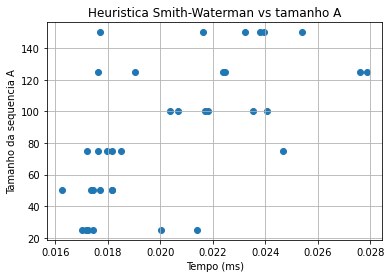

In [825]:
plt.scatter(tempos_heuristica, tamanhos_A)
plt.title("Heuristica Smith-Waterman vs tamanho A")
plt.xlabel("Tempo (ms)")
plt.ylabel("Tamanho da sequencia A")
plt.grid()

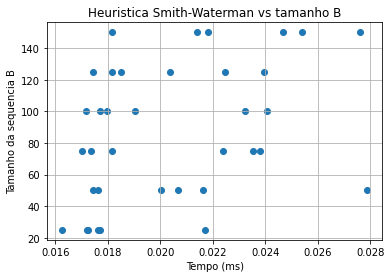

In [826]:
plt.scatter(tempos_heuristica, tamanhos_B)
plt.title("Heuristica Smith-Waterman vs tamanho B")
plt.xlabel("Tempo (ms)")
plt.ylabel("Tamanho da sequencia B")
plt.grid()

Text(0.5, 0.92, 'Heuristica Smith-Waterman')

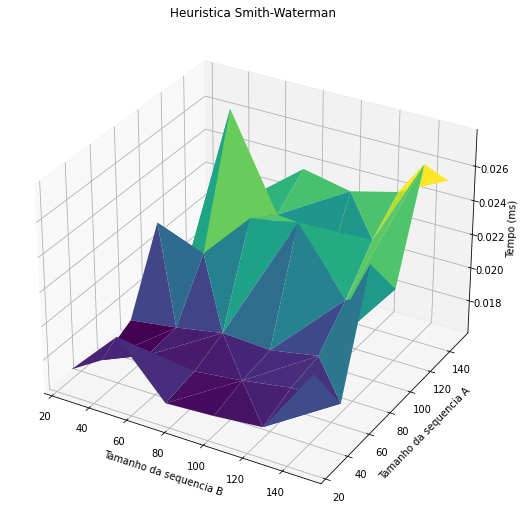

In [827]:
fig = plt.figure(figsize=(30,55))
heuristica_graph = fig.add_subplot(133, projection='3d')
heuristica_graph.plot_trisurf(tamanhos_B, tamanhos_A, tempos_heuristica,cmap='viridis')
heuristica_graph.set_xlabel('Tamanho da sequencia B')
heuristica_graph.set_ylabel('Tamanho da sequencia A')
heuristica_graph.set_zlabel('Tempo (ms)')
heuristica_graph.set_title('Heuristica Smith-Waterman')


### Proffiling

Abaixo temos o proffiling, que foi obtido atraves da ferramenta valgrind. OBS : A IMAGEM NÃO APARECE NO HTML, FAVOR OLHAR NO GIT :)

![Smith Waterman](images/smithwaterman-valgrind.png)

Como podemos observar acima, o principal ponto de lentidão do código é a parte em que a matriz H é criada, já que nessa parte é utilizado um for dentro do outro além de mexer com um vetor dentro de outro, o que acaba também sendo custoso.

# Parte 2 - Um algoritmo Local para Alinhamento

Para o algoritmo de busca local, a estratégia utilizada foi a aleatoridade. A busca local compara uma subsequencia com diversas outras subsequencias, de modo aleatório. O objetivo é tentar comparar o maior número de subsequencias para que com sorte o resultado seja satisfatório. 

Este algoritmo é o inverso da heuristica de Smith-Waterman, já que utliza pouco exploitation e muito exploration.

In [828]:
tempos_busca_local = []
for f in in_files:
  tempos_busca_local.append(roda_com_entrada('./busca-local','in-files/{}'.format(f)))

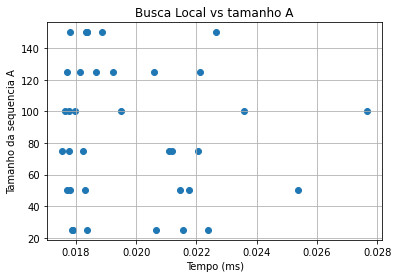

In [829]:
plt.scatter(tempos_busca_local, tamanhos_A)
plt.title("Busca Local vs tamanho A")
plt.xlabel("Tempo (ms)")
plt.ylabel("Tamanho da sequencia A")
plt.grid()

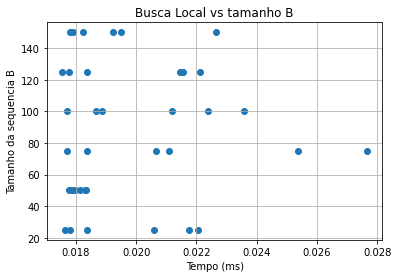

In [830]:
plt.scatter(tempos_busca_local, tamanhos_B)
plt.title("Busca Local vs tamanho B")
plt.xlabel("Tempo (ms)")
plt.ylabel("Tamanho da sequencia B")
plt.grid()

Text(0.5, 0.92, 'Busca Local')

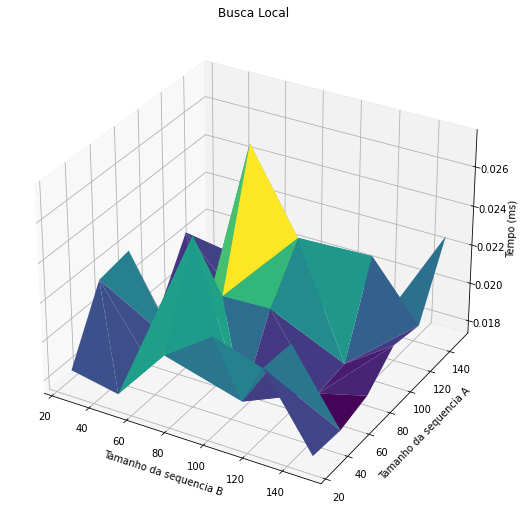

In [831]:
fig2 = plt.figure(figsize=(30,55))
b_local_graph = fig2.add_subplot(133, projection='3d')
b_local_graph.plot_trisurf(tamanhos_B, tamanhos_A, tempos_busca_local,cmap='viridis')
b_local_graph.set_xlabel('Tamanho da sequencia B')
b_local_graph.set_ylabel('Tamanho da sequencia A')
b_local_graph.set_zlabel('Tempo (ms)')
b_local_graph.set_title('Busca Local')

### Proffiling

Abaixo temos o proffiling, que foi obtido atraves da ferramenta valgrind. OBS : A IMAGEM NÃO APARECE NO HTML, FAVOR OLHAR NO GIT :)

![busca-local-valgrind](images/busca-local-valgrind.png)

Como podemos observar acima, o principal ponto de lentidão do código é a parte em que é gerado as subsequencias de B no loop for, já que nele a função generate_subsequence é chamada p vezes. Porém esse ponto de lentidão não é tão relevante em relação ao resto do código, já que o algoritmo já é bem rápido e se encontra relativamente otimizado em questão de tempo.

# Parte 3 - Busca Exaustiva para Alinhamento de Sequencias

De forma geral, a busca exaustiva gera todas as subsequências possíveis das duas sequências e compara todas elas entre si. Porém, um problema acaba aparecendo, que é como comparar duas subsequências de tamanho diferente? A estratégia utilizada foi o truncamento da subsequencia maior pelo tamanho da subsequência menor, ou seja, a subsequencia menor é comparada com todas as possíveis substrings da subsequencia maior. 

Porém o que foi percebido é que não faz sentido comparar subsequencias de tamanhos diferente, já que todas as substrings da subsequencia maior já foram geradas anteriormente, logo esse passo acaba sendo redundante. Desse modo, o algoritmo exaustivo gera todas as substrigns possíveis das sequências e comparam todas as que possuem o mesmo tamanho, o que acaba poupando tempo e otimizando o código.

Este algoritmo utiliza apenas exploration, e nada de exploitation


In [832]:
tempos_exaustiva = []
for f in in_files:
  tempos_exaustiva.append(roda_com_entrada('./busca-exaustiva','in-files/{}'.format(f)))

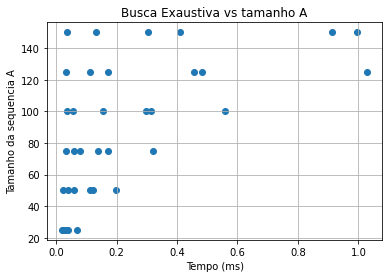

In [833]:
plt.scatter(tempos_exaustiva, tamanhos_A)
plt.title("Busca Exaustiva vs tamanho A")
plt.xlabel("Tempo (ms)")
plt.ylabel("Tamanho da sequencia A")
plt.grid()

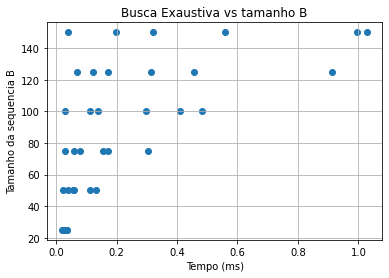

In [834]:
plt.scatter(tempos_exaustiva, tamanhos_B)
plt.title("Busca Exaustiva vs tamanho B")
plt.xlabel("Tempo (ms)")
plt.ylabel("Tamanho da sequencia B")
plt.grid()

Text(0.5, 0.92, 'Busca Exaustiva')

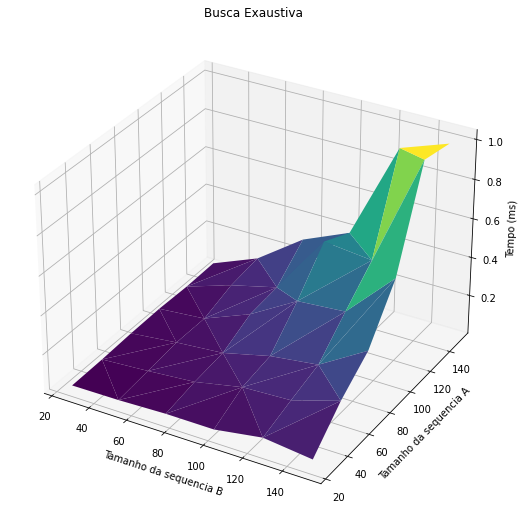

In [835]:
fig3 = plt.figure(figsize=(30,55))
b_exaust_graph = fig3.add_subplot(133, projection='3d')
b_exaust_graph.plot_trisurf(tamanhos_B, tamanhos_A, tempos_exaustiva,cmap='viridis')
b_exaust_graph.set_xlabel('Tamanho da sequencia B')
b_exaust_graph.set_ylabel('Tamanho da sequencia A')
b_exaust_graph.set_zlabel('Tempo (ms)')
b_exaust_graph.set_title('Busca Exaustiva')

### Proffiling

Abaixo temos o proffiling, que foi obtido atraves da ferramenta valgrind. 
OBS : A IMAGEM NÃO APARECE NO HTML, FAVOR OLHAR NO GIT :)

![busca-local-exaustiva](images/busca-exaustiva-valgrind.png)

Como podemos observar acima, o principal ponto de lentidão do código é exatamente o esperado, a parte em que é feito a comparação exaustiva entre todas as possíveis subsequencias, já que nessa parte é utilizado um for dentro de outro for que checa o tamanho de cada subsequencia. 

# Parte 4 - Paralelismo com OpenMP

Após experimentar as três estratégias sequenciais para o problema de alinhamento de sequencias de DNA, esta etapa do projeto tem como objetivo explorar estratégias de paralelismo, nesse caso, um modelo multicore e para isso utilizaremos o OpenMP. 

In [861]:
tempos_exaustiva_openMP = []
for f in in_files:
  tempos_exaustiva_openMP.append(roda_com_entrada('./busca-exaustiva-openMP','in-files/{}'.format(f)))

Text(0.5, 0.92, 'Exaustiva openMP')

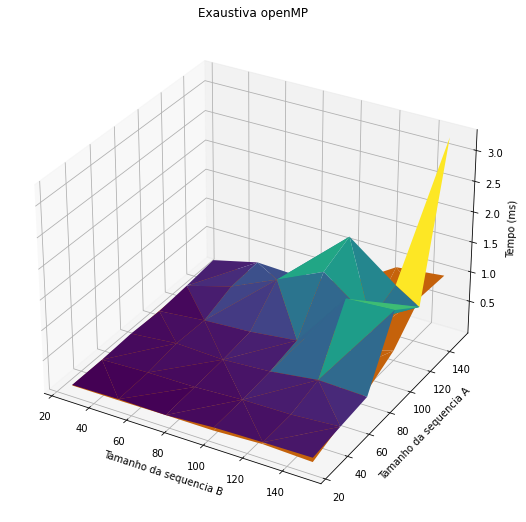

In [862]:
fig4 = plt.figure(figsize=(30,55))
exaust_openMP_graph = fig4.add_subplot(133, projection='3d')
exaust_openMP_graph.plot_trisurf(tamanhos_B, tamanhos_A, tempos_exaustiva_openMP,cmap='viridis')
exaust_openMP_graph.plot_trisurf(tamanhos_B, tamanhos_A, tempos_exaustiva)
exaust_openMP_graph.set_xlabel('Tamanho da sequencia B')
exaust_openMP_graph.set_ylabel('Tamanho da sequencia A')
exaust_openMP_graph.set_zlabel('Tempo (ms)')
exaust_openMP_graph.set_title('Exaustiva openMP')

In [877]:
print("exaustiva sequencial")
print(roda_com_entrada('./busca-exaustiva','dna.seq'.format(f)))

print("exaustiva openMP")
print(roda_com_entrada('./busca-exaustiva-openMP','dna.seq'.format(f)))

exaustiva sequencial
1.342677968001226
exaustiva openMP
1.0571328810001432
